# **Hypothesis Testing Exercise**

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions

Minitab File = Cutlets.mtw






In [14]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#load the dataset
data = pd.read_csv(r"/content/Cutlets.csv")

In [3]:
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
data.nunique()

Unit A    35
Unit B    35
dtype: int64

In [6]:
data.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
data[data.duplicated()].shape

(0, 2)

In [8]:
data[data.duplicated()]

,Unit A,Unit B


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


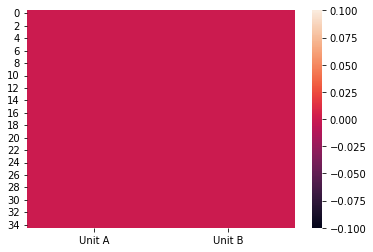

In [10]:
sns.heatmap(data.isnull())

In [11]:
unitA=pd.Series(data.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [12]:
unitB=pd.Series(data.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

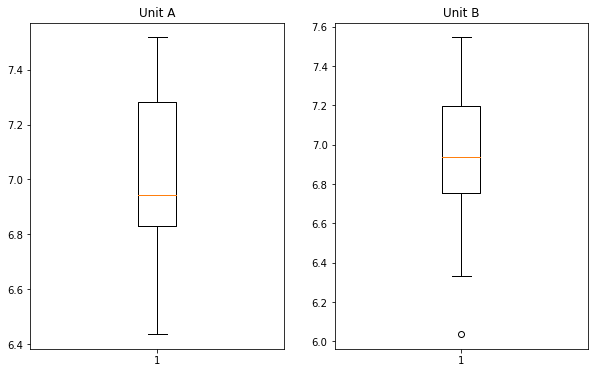

In [22]:
plt.subplots(figsize = (10,6))
plt.subplot(121)
plt.boxplot(data['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(data['Unit B'])
plt.title('Unit B')
plt.show()

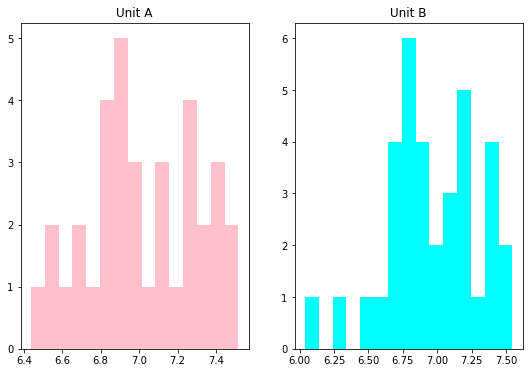

In [29]:
#histogram 

plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(data['Unit A'], bins = 15, color ="pink")
plt.title('Unit A')
plt.subplot(122)
plt.hist(data['Unit B'], bins = 15, color = "cyan")
plt.title('Unit B')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


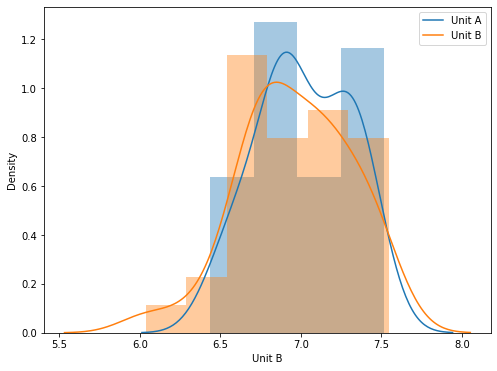

In [26]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(data['Unit A'], kde = True)
sns.distplot(data['Unit B'],hist = True)
plt.legend(labels)

In [30]:
# hypothesis testing using t-test
p_value=stats.ttest_ind(unitA,unitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [31]:
round(p_value[1],4)

0.4722

In [32]:
# compare p_value with α = 0.05 (At 5% significance level)
# P_value >= aplha 
# We fail to reject Null hypothesis
'''Hence, We fail to reject Null Hypothesis because of lack of evidence, 
there is no significant difference between the two samples '''

'Hence, We fail to reject Null Hypothesis because of lack of evidence, \nthere is no significant difference between the two samples '